# Data loading and visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
merged_df = pd.read_csv('data/cleaned/merged_df.csv')
display(merged_df.head())
print(merged_df.shape)

,State,County,Percent of Children with Confirmed BLLs ³5 µg/dL,Built 2020 or later,Built 2000 to 2019,Built 1980 to 1999,Built 1960 to 1979,Built 1940 to 1959,Built 1939 or earlier,Lacking complete plumbing facilities,...,Income in the past 12 months at or above poverty level:!!18 to 64 years,Income in the past 12 months at or above poverty level:!!65 years and over,lat,lng,ADHD Percentage (Ever),ADHD Percentage (Current),ADHD Behavior Treatment(%),ADHD Medication(%),ADHD Meds or BT,Any Treatment
0,AL,AUTAUGA,NaN,0.018971,0.348779,0.233663,0.310232,0.058325,0.030030,0.5,...,0.567738,0.151584,32.5349,-86.6427,12.7,12.1,50.6,77.0,84.3,91.2
1,AL,BALDWIN,NaN,0.016696,0.460808,0.317366,0.156746,0.030529,0.017855,0.3,...,0.515682,0.202625,30.7277,-87.7226,12.7,12.1,50.6,77.0,84.3,91.2
2,AL,BARBOUR,NaN,0.000000,0.171020,0.400188,0.253661,0.104736,0.070395,0.2,...,0.491164,0.187543,31.8696,-85.3932,12.7,12.1,50.6,77.0,84.3,91.2
3,AL,BIBB,NaN,0.000000,0.269087,0.378022,0.226947,0.060487,0.065456,0.7,...,0.501439,0.183021,32.9986,-87.1265,12.7,12.1,50.6,77.0,84.3,91.2
4,AL,BLOUNT,0.0,0.003596,0.272173,0.367732,0.221302,0.092610,0.042588,0.6,...,0.532138,0.165438,33.9809,-86.5674,12.7,12.1,50.6,77.0,84.3,91.2


(2151, 66)


Descriptive Statistics for 'Percent of Children with Confirmed BLLs ³5 µg/dL':
count    1352.000000
mean        1.282089
std         2.204850
min         0.000000
25%         0.000000
50%         0.565000
75%         1.700000
max        39.000000
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, dtype: float64


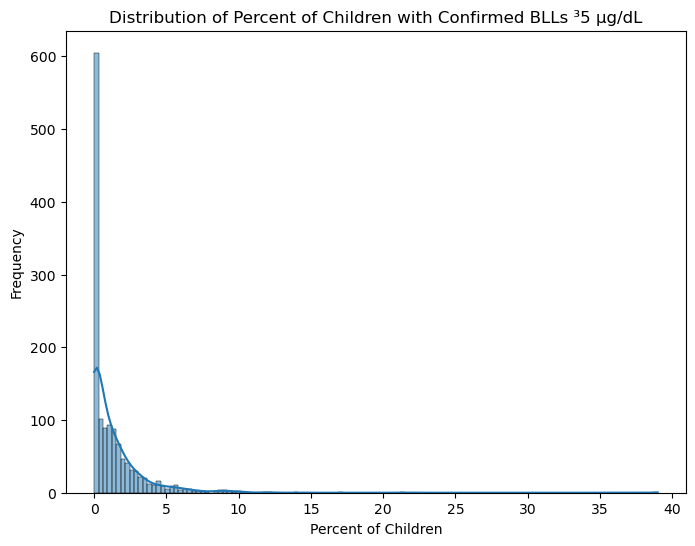

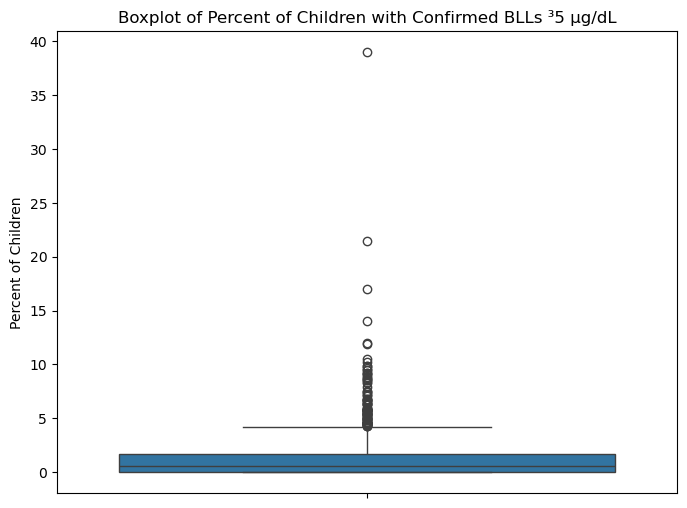

In [5]:
# Visualizations
bll_column = 'Percent of Children with Confirmed BLLs ³5 µg/dL'
bll_stats = merged_df[bll_column].describe()
print(f"Descriptive Statistics for '{bll_column}':\n{bll_stats}")

plt.figure(figsize=(8, 6))
sns.histplot(merged_df[bll_column].dropna(), kde=True)
plt.title('Distribution of Percent of Children with Confirmed BLLs ³5 µg/dL')
plt.xlabel('Percent of Children')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df[bll_column])
plt.title('Boxplot of Percent of Children with Confirmed BLLs ³5 µg/dL')
plt.ylabel('Percent of Children')
plt.show()

# EDA

In [6]:
# Get the indices of rows with non-NaN values in the target column
non_nan_indices = merged_df['Percent of Children with Confirmed BLLs ³5 µg/dL'].dropna().index

# Calculate the 90 percentile on the non-NaN data
upper_limit = merged_df.loc[non_nan_indices, 'Percent of Children with Confirmed BLLs ³5 µg/dL'].quantile(0.90)

# Identify outlier indices
outlier_indices = merged_df.loc[non_nan_indices][merged_df.loc[non_nan_indices, 'Percent of Children with Confirmed BLLs ³5 µg/dL'] > upper_limit].index

# Remove the outlier rows from the DataFrame. Store our non-outlier data in filtered_df
filtered_df = merged_df.drop(index=outlier_indices)
print(filtered_df.shape)

(2027, 66)


Built 1939 or earlier              0.392133
Built 1940 to 1959                 0.242677
House Price$100,000 to $149,999    0.199323
House Price$50,000 to $99,999      0.192036
lat                                0.184403
                                     ...   
House Price$500,000 to $999,999   -0.171025
ADHD Percentage (Current)         -0.175880
ADHD Percentage (Ever)            -0.178707
Built 2000 to 2019                -0.268404
Built 1980 to 1999                -0.340237
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, Length: 63, dtype: float64


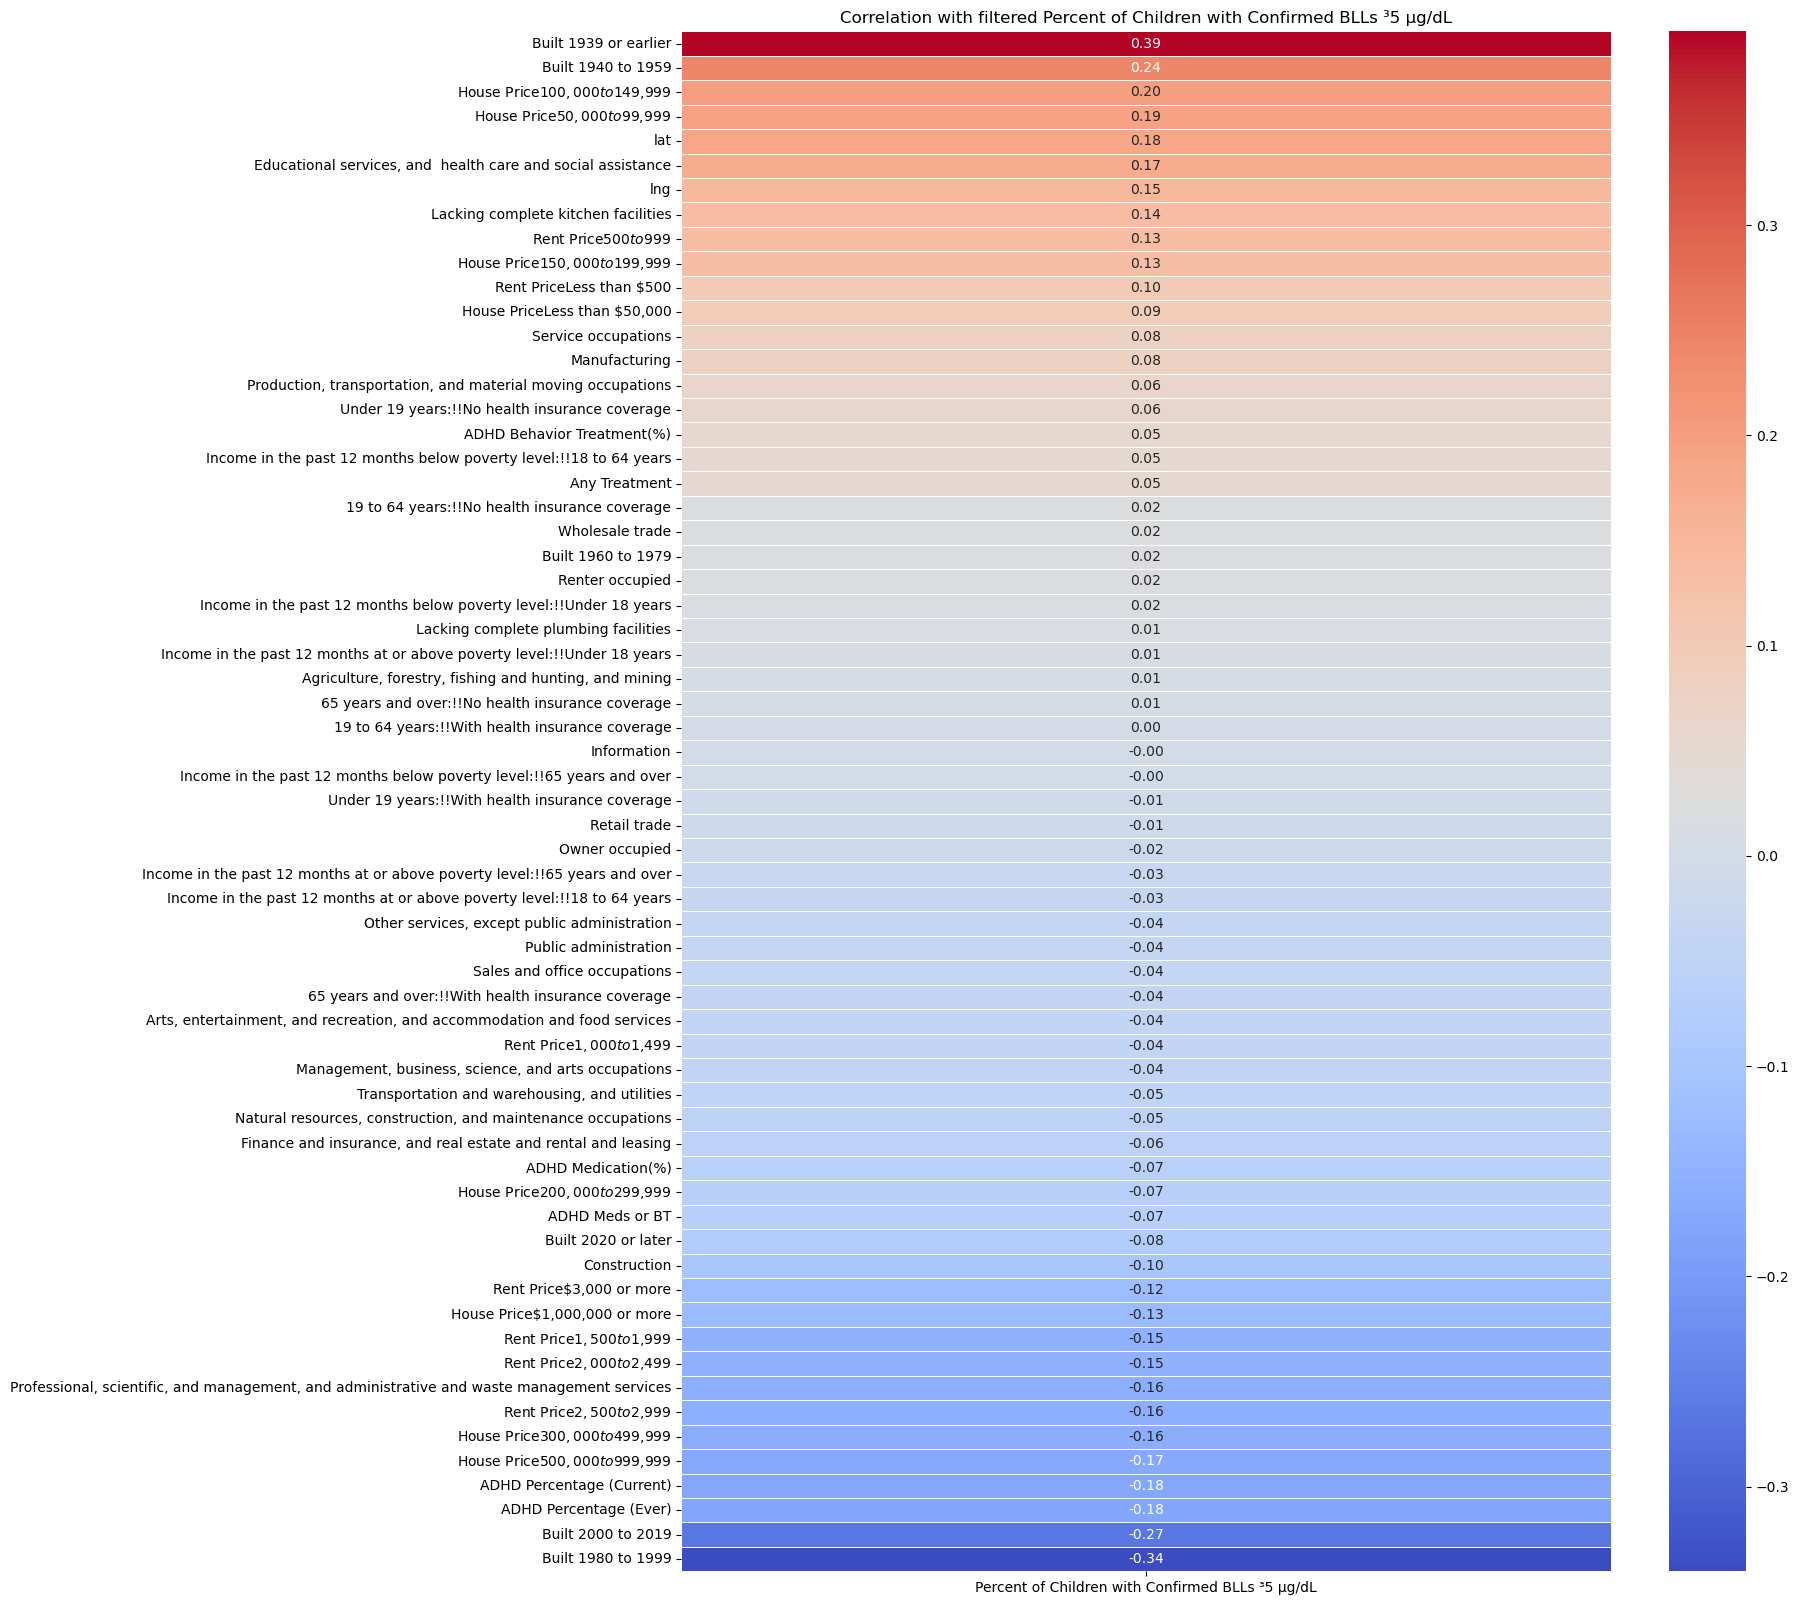

In [7]:
# Correlation analysis and visualization
# Remove relevant columns
columns_to_exclude = ['State', 'County']
correlation_filtered_df = filtered_df.drop(columns=columns_to_exclude, errors="ignore")

# Define modified data frame
correlation_with_bll = correlation_filtered_df.corr().drop('Percent of Children with Confirmed BLLs ³5 µg/dL')

# Sort the correlations in descending order
sorted_correlations = correlation_with_bll['Percent of Children with Confirmed BLLs ³5 µg/dL'].sort_values(ascending=False)

# Print correlations
print(sorted_correlations)

# Visualize
plt.figure(figsize=(15, 20))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation with filtered {'Percent of Children with Confirmed BLLs ³5 µg/dL'}")
plt.show()

In [8]:
# Determine number of missing values in filtered_df
missing_percentage = filtered_df[bll_column].isnull().sum() / len(filtered_df) * 100
print(f"Percentage of missing values in '{bll_column}': {missing_percentage:.2f}%")

Percentage of missing values in 'Percent of Children with Confirmed BLLs ³5 µg/dL': 39.42%


# Data cleaning for features

In [9]:
# Identify columns with missing values, excluding specified columns
cols_with_missing = [col for col in filtered_df.columns if filtered_df[col].isnull().any()
and col not in ['Percent of Children with Confirmed BLLs ³5 µg/dL']]

print(len(cols_with_missing))
print(cols_with_missing)

57
['Built 2020 or later', 'Built 2000 to 2019', 'Built 1980 to 1999', 'Built 1960 to 1979', 'Built 1940 to 1959', 'Built 1939 or earlier', 'Lacking complete plumbing facilities', 'Lacking complete kitchen facilities', 'House PriceLess than $50,000', 'House Price$50,000 to $99,999', 'House Price$100,000 to $149,999', 'House Price$150,000 to $199,999', 'House Price$200,000 to $299,999', 'House Price$300,000 to $499,999', 'House Price$500,000 to $999,999', 'House Price$1,000,000 or more', 'Rent PriceLess than $500', 'Rent Price$500 to $999', 'Rent Price$1,000 to $1,499', 'Rent Price$1,500 to $1,999', 'Rent Price$2,000 to $2,499', 'Rent Price$2,500 to $2,999', 'Rent Price$3,000 or more', 'Owner occupied', 'Renter occupied', 'Under 19 years:!!With health insurance coverage', 'Under 19 years:!!No health insurance coverage', '19 to 64 years:!!With health insurance coverage', '19 to 64 years:!!No health insurance coverage', '65 years and over:!!With health insurance coverage', '65 years and o

In [10]:
# Impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42) #one can adjusts max_iter
imputer.fit(filtered_df[cols_with_missing])
imputed_data = imputer.transform(filtered_df[cols_with_missing])
filtered_df[cols_with_missing] = imputed_data

In [11]:
# Check to see if there are columns with missing values left
cols_with_missing = [col for col in filtered_df.columns if filtered_df[col].isnull().any()
and col not in ['Percent of Children with Confirmed BLLs ³5 µg/dL']]

print(cols_with_missing)

[]


# Feature engineering

In [13]:
# Remove house price and rent price features and some more

cols_to_remove = [
    'House PriceLess than $50,000',
    'House Price$50,000 to $99,999',
    'House Price$100,000 to $149,999',
    'House Price$150,000 to $199,999',
    'House Price$200,000 to $299,999',
    'House Price$300,000 to $499,999',
    'House Price$500,000 to $999,999',
    'House Price$1,000,000 or more',
    'Rent PriceLess than $500',
    'Rent Price$500 to $999',
    'Rent Price$1,000 to $1,499',
    'Rent Price$1,500 to $1,999',
    'Rent Price$2,000 to $2,499',
    'Rent Price$2,500 to $2,999',
    'Rent Price$3,000 or more',
    'Built 2020 or later',
    'Built 2000 to 2019',
    'Built 1980 to 1999'
]
# Drop the columns from your DataFrame
filtered_df = filtered_df.drop(columns=cols_to_remove, errors="ignore")
print(filtered_df.shape)

(2027, 48)


In [14]:
# Count non-null values in the target column
non_null_count = filtered_df['Percent of Children with Confirmed BLLs ³5 µg/dL'].notna().sum()

# Print the count
print(f"Number of rows with non-null percent bll values: {non_null_count}")

Number of rows with non-null percent bll values: 1228


# Data splitting


In [15]:
from sklearn.model_selection import train_test_split

# Remove 'State' and 'County'
new_df = filtered_df.drop(columns=['State', 'County'])
# Split data into training and prediction sets
df_train = new_df[filtered_df[bll_column].notnull()]
df_predict = new_df[filtered_df[bll_column].isnull()]

# Features (X) and target variable (y)
X_train = df_train.drop(columns=bll_column)
y_train = df_train[bll_column]
X_predict = df_predict.drop(columns=bll_column)

# Split training sets into 80/20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("X_predict", X_predict.shape)


X_train shape: (982, 45)
X_val shape: (246, 45)
y_train shape: (982,)
y_val shape: (246,)
X_predict (799, 45)


In [16]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fit and transform
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Model training with XGboost

In [39]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_grid_xgb,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_xgb.fit(X_train_scaled, y_train)

# Get best params and best model
best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_
print("Best XGBoost Parameters:", best_params_xgb)

# Make predictions on validation set
y_pred_xgb = best_xgb_model.predict(X_val_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=7, 

In [40]:
from sklearn.metrics import mean_squared_error, r2_score # Import necessary metrics
# Evaluate the model
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Calculate RMSE
rmse_xgb = np.sqrt(mse_xgb)

print(f"XGBoost - Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")

XGBoost - Root Mean Squared Error: 0.59004767789169
XGBoost - R-squared: 0.6036247357585649


In [41]:
# Get feature importance
feature_importance_xgb = best_xgb_model.feature_importances_

# Create df for feature importance
feature_importance_xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_xgb
})

# Sort by importance
feature_importance_xgb_df = feature_importance_xgb_df.sort_values(by='Importance', ascending=False)

# Select top 15 features
top_10_features_xgb = feature_importance_xgb_df['Feature'].head(10).tolist()

# Print feature names and indices for verification
for feature in top_10_features_xgb:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1939 or earlier, Index: 2
Feature: ADHD Percentage (Current), Index: 40
Feature: 19 to 64 years:!!No health insurance coverage, Index: 10
Feature: ADHD Medication(%), Index: 42
Feature: ADHD Meds or BT, Index: 43
Feature: ADHD Behavior Treatment(%), Index: 41
Feature: ADHD Percentage (Ever), Index: 39
Feature: Educational services, and  health care and social assistance, Index: 22
Feature: lat, Index: 37
Feature: 19 to 64 years:!!With health insurance coverage, Index: 9


In [42]:
# Feature Selection: Select the top 10 features from X_train and X_val
X_train_selected = X_train[top_10_features_xgb]
X_val_selected = X_val[top_10_features_xgb]

# Scale the selected features
scaler = StandardScaler()  # Create a new scaler instance
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_val_selected_scaled = scaler.transform(X_val_selected)


# Implement XGBoost again
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params_xgb)

# Train the model on the selected features
model.fit(X_train_selected_scaled, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val_selected_scaled)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mse)

print(f"Model - Root Mean Squared Error: {rmse}")
print(f"Model - R-squared: {r2}")

Model - Root Mean Squared Error: 0.5716941460483467
Model - R-squared: 0.6278998681868628


# Visualizations of predicted vs actual values and bar chart for feature importance

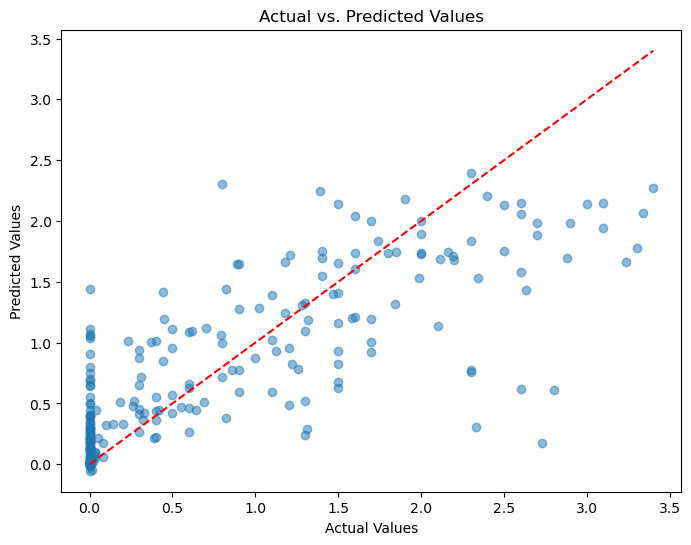

In [43]:
# Scatter plot of predicted versus actual values

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

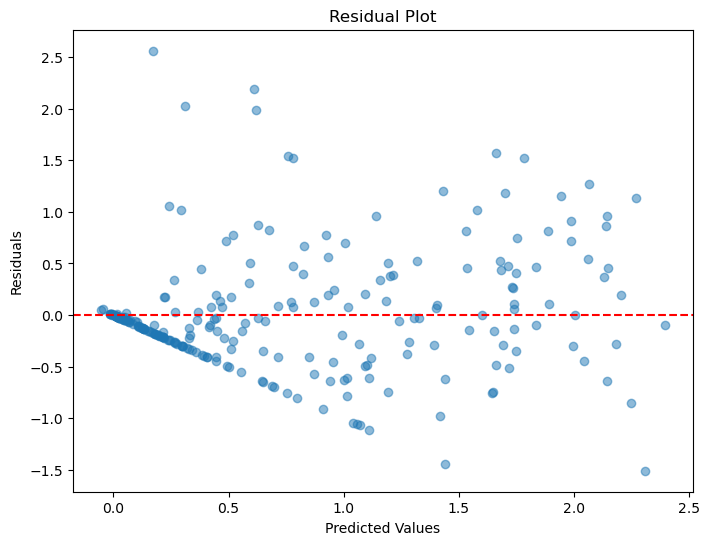

In [44]:
# Residual plot
residuals = y_val - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

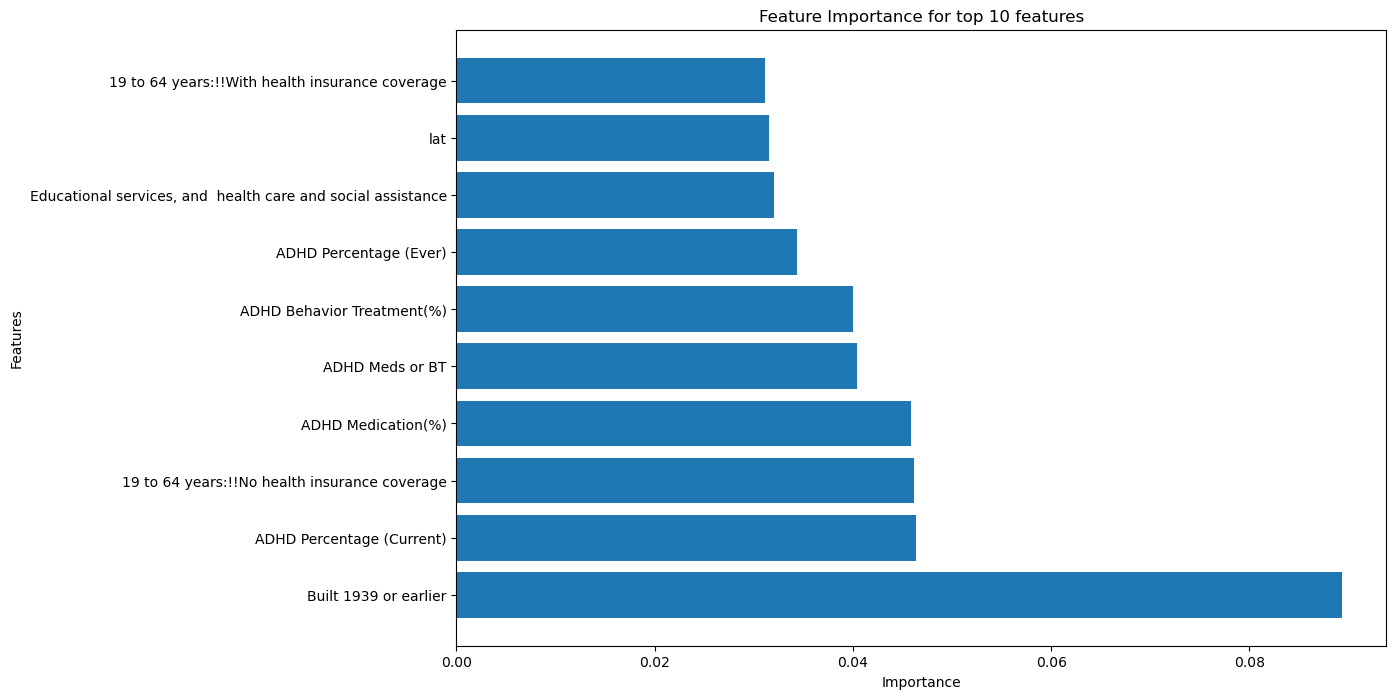

In [45]:
# Bar chart of top 10 features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_xgb_df['Feature'].head(10), feature_importance_xgb_df['Importance'].head(10)) #Changed this line
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for top 10 features")
plt.show()